# Generate yellow smiley faces 🙂

## load dependencies
* matplotlib for plotting
* numpy for array handling
* json for loading emoji description
* misc and glob for reading PNG
* tensorflow for GAN

In [54]:
%matplotlib inline

import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import json
import glob
import random
from pprint import pprint

In [22]:
# filter only person emojis without tones
with open('emojione-2.2.7/emoji.json') as data_file:
    emojis = json.load(data_file)

smileys = {k: v for k, v in emojis.items() if v["category"] == "people" and not "_tone" in k}
pprint("original dictionary:")
pprint({key: smileys[key] for key in list(smileys.keys())[:1]})

smileys = {k: {"keywords": v["keywords"], "unicode": v["unicode"], "ascii": v["aliases_ascii"], "name": v["name"]} for k,v in smileys.items()}
pprint("minimized dictionary: {} left out of {} emojis".format(len(smileys), len(emojis)))
pprint({key: smileys[key] for key in list(smileys.keys())[:2]})

'original dictionary:'
{'grinning': {'aliases': [],
              'aliases_ascii': [],
              'category': 'people',
              'code_decimal': '&#128512;',
              'emoji_order': '1',
              'keywords': ['happy', 'smiley', 'emotion'],
              'name': 'grinning face',
              'shortname': ':grinning:',
              'unicode': '1f600',
              'unicode_alt': ''}}
'minimized dictionary: 225 left out of 1820 emojis'
{'grin': {'ascii': [],
          'keywords': ['happy', 'silly', 'smiley', 'emotion', 'good', 'selfie'],
          'name': 'grinning face with smiling eyes',
          'unicode': '1f601'},
 'grinning': {'ascii': [],
              'keywords': ['happy', 'smiley', 'emotion'],
              'name': 'grinning face',
              'unicode': '1f600'}}


In [50]:
image_paths = glob.glob("./emojione-2.2.7/assets/png/*.png")
#pprint(image_paths[:10])
filtered_files = [v["unicode"] for k,v in smileys.items()]
filtered_files = [next(filter(lambda p: f+".png" in p, image_paths)) for f in filtered_files]

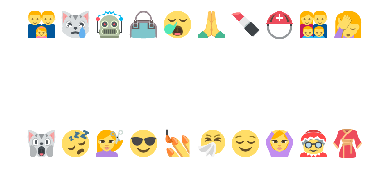

In [58]:
# display 20 random emojis
display_count = 20
f, axarr = plt.subplots(2, display_count//2)
for (i, f) in enumerate(random.sample(filtered_files, display_count)):
    img=mpimg.imread(f)
    a = axarr[0 + i//(display_count//2), i%(display_count//2)]
    a.imshow(img)
    a.axis("off")